In [1]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [4]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
lending_df_path = "Resources/lending_data.csv"

lending_df = pd.read_csv(lending_df_path)

# Review the DataFrame
# YOUR CODE HERE!
lending_df

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0
...,...,...,...,...,...,...,...,...
77531,19100.0,11.261,86600,0.653580,12,2,56600,1
77532,17700.0,10.662,80900,0.629172,11,2,50900,1
77533,17600.0,10.595,80300,0.626401,11,2,50300,1
77534,16300.0,10.068,75300,0.601594,10,2,45300,1


### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [7]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = lending_df["loan_status"]

# Separate the X variable, the features
X = lending_df.drop(columns=["loan_status"])

In [8]:
# Review the y variable Series
print(y)

0        0
1        0
2        0
3        0
4        0
        ..
77531    1
77532    1
77533    1
77534    1
77535    1
Name: loan_status, Length: 77536, dtype: int64


In [9]:
# Review the X variable DataFrame
print(X)

       loan_size  interest_rate  borrower_income  debt_to_income  \
0        10700.0          7.672            52800        0.431818   
1         8400.0          6.692            43600        0.311927   
2         9000.0          6.963            46100        0.349241   
3        10700.0          7.664            52700        0.430740   
4        10800.0          7.698            53000        0.433962   
...          ...            ...              ...             ...   
77531    19100.0         11.261            86600        0.653580   
77532    17700.0         10.662            80900        0.629172   
77533    17600.0         10.595            80300        0.626401   
77534    16300.0         10.068            75300        0.601594   
77535    15600.0          9.742            72300        0.585062   

       num_of_accounts  derogatory_marks  total_debt  
0                    5                 1       22800  
1                    3                 0       13600  
2                 

### Step 3: Check the balance of the labels variable (`y`) by using the `value_counts` function.

In [10]:
# Check the balance of our target values
y.value_counts()

loan_status
0    75036
1     2500
Name: count, dtype: int64

### Step 4: Split the data into training and testing datasets by using `train_test_split`.

In [11]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [15]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
classifier = LogisticRegression(solver="lbfgs", random_state=1)

# Fit the model using training data
classifier.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [16]:
# Score the model
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print (f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.9927947448067135
Testing Data Score: 0.9927259595542716


### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [18]:
# Make a prediction using the testing data
predicted_ = classifier.predict(X_test)
pd.DataFrame({"prediction:": predicted_, "Actual": y_test})


,prediction:,Actual
60914,0,0
36843,0,0
1966,0,0
70137,0,0
27237,0,0
...,...,...
45639,0,0
11301,0,0
51614,0,0
4598,0,0


### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [24]:
# Print the balanced_accuracy score of the model
# Make predictions
y_pred = classifier.predict(X_test)

# Calculate and print the balanced accuracy score
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy Score: {balanced_accuracy}")


Balanced Accuracy Score: 0.9696852964585789


In [25]:
# Generate a confusion matrix for the model
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[18658   107]
 [   34   585]]


In [28]:
pip install seaborn


  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.9 kB 435.7 kB/s eta 0:00:01
   -------- ------------------------------ 61.4/294.9 kB 812.7 kB/s eta 0:00:01
   ----------------------- ---------------- 174.1/294.9 kB 1.5 MB/s eta 0:00:01
   -------------------------------------- - 286.7/294.9 kB 1.8 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 1.8 MB/s eta 0:00:00


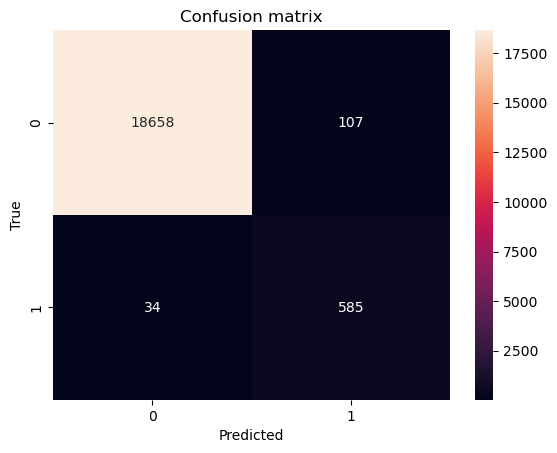

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [31]:
# Print the classification report for the model
report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.85      0.95      0.89       619

    accuracy                           0.99     19384
   macro avg       0.92      0.97      0.94     19384
weighted avg       0.99      0.99      0.99     19384



### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** WRITE YOUR ANSWER HERE!

---

In [34]:
pip install imblearn

  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/92/e8/86c36e1b13007ca9c89381adac6c078cfc8fb71841a76c08a3fe3eca91d3/imbalanced_learn-0.12.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/257.7 kB ? eta -:--:--
   - -------------------------------------- 10.2/257.7 kB ? eta -:--:--
   ------------ --------------------------- 81.9/257.7 kB 1.5 MB/s eta 0:00:01
   ------------------------------ --------- 194.6/257.7 kB 2.4 MB/s eta 0:00:01
   ---------------------------------------- 257.7/257.7 kB 2.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


## Predict a Logistic Regression Model with Resampled Training Data

### Step 1: Use the `RandomOverSampler` module from the imbalanced-learn library to resample the data. Be sure to confirm that the labels have an equal number of data points. 

In [36]:
from imblearn.over_sampling import RandomOverSampler

# Instantiate the random oversampler model
# Assign a random_state parameter of 1 to the model
ros = RandomOverSampler(random_state=1)

# Fit the original training data to the random_oversampler model
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)


In [40]:
# Count the distinct values of the resampled labels data
X_resampled.value_counts

<bound method DataFrame.value_counts of         loan_size  interest_rate  borrower_income  debt_to_income  \
0          8600.0          6.792            44500        0.325843   
1          7800.0          6.419            41000        0.268293   
2         10000.0          7.386            50100        0.401198   
3          9300.0          7.093            47300        0.365751   
4          9200.0          7.045            46900        0.360341   
...           ...            ...              ...             ...   
112537    17500.0         10.577            80100        0.625468   
112538    20000.0         11.611            89900        0.666296   
112539    19200.0         11.266            86600        0.653580   
112540    19100.0         11.245            86400        0.652778   
112541    20700.0         11.913            92700        0.676375   

        num_of_accounts  derogatory_marks  total_debt  
0                     3                 0       14500  
1                  

### Step 2: Use the `LogisticRegression` classifier and the resampled data to fit the model and make predictions.

In [41]:
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
classifier = LogisticRegression(random_state=1)

# Fit the model using the resampled training data
classifier.fit(X_resampled, y_resampled)

# Make a prediction using the testing data
y_pred = classifier.predict(X_test)


### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [43]:
y_pred = classifier.predict(X_resampled)

# Calculate and print the balanced accuracy score
balanced_accuracy = balanced_accuracy_score(y_resampled, y_pred)
print(f"Balanced Accuracy Score: {balanced_accuracy}")


Balanced Accuracy Score: 0.9946686570347071


In [44]:
# Generate a confusion matrix for the model
# Generate a confusion matrix for the model
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_resampled, y_pred)

print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[55957   314]
 [  286 55985]]


In [45]:
# Print the classification report for the model
report = classification_report(y_resampled, y_pred)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     56271
           1       0.99      0.99      0.99     56271

    accuracy                           0.99    112542
   macro avg       0.99      0.99      0.99    112542
weighted avg       0.99      0.99      0.99    112542



### Step 4: Answer the following question

**Question:** How well does the logistic regression model, fit with oversampled data, predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** YOUR ANSWER HERE!